In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)  # 자주 나타나는 단어 10000개
"""
입력 데이터 : 단어 인덱스 리스트 (단어 시퀀스가 인코딩 된 것)
label : 부정(0), 긍정(1)
"""

17465344/17464789 [==============================] - 0s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
x_train.shape

(25000, 10000)

In [13]:
y_train.shape

(25000,)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 4s 31ms/step - loss: 0.5165 - accuracy: 0.7877 - val_loss: 0.4022 - val_accuracy: 0.8558
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3196 - accuracy: 0.9005 - val_loss: 0.3225 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2283 - accuracy: 0.9285 - val_loss: 0.2796 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1804 - accuracy: 0.9417 - val_loss: 0.2819 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1446 - accuracy: 0.9548 - val_loss: 0.2957 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1211 - accuracy: 0.9633 - val_loss: 0.2918 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0994 - accuracy: 0.9699 - val_loss: 0.3407 - val_accuracy: 0.8735
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

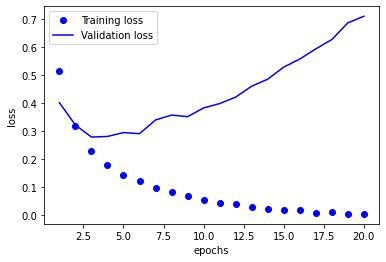

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

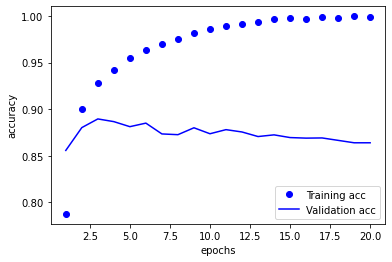

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.5352 - accuracy: 0.8125
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.3222 - accuracy: 0.8977
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2341 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2996 - accuracy: 0.8783


In [22]:
result

[0.29956212639808655, 0.878279983997345]

In [23]:
model.predict(x_test)

array([[0.17484596],
       [0.99951375],
       [0.70250416],
       ...,
       [0.07183785],
       [0.07356435],
       [0.34348357]], dtype=float32)